In [1]:
cd "C:\Users\saisri\Desktop\Final year project\dataset"

C:\Users\saisri\Desktop\Final year project\dataset


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import mne

In [4]:
from mne.datasets import testing
from mne.io import read_raw_edf
from mne.utils import run_tests_if_main
from mne import pick_types, find_events

In [5]:
raw=mne.io.read_raw_gdf(r'C:\Users\saisri\Desktop\Final year project\dataset\A01T.gdf',stim_channel='None',preload='True')

Extracting EDF parameters from C:\Users\saisri\Desktop\Final year project\dataset\A01T.gdf...
GDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


c:\users\saisri\appdata\local\programs\python\python37\lib\site-packages\mne\io\edf\edf.py:1001: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
<ipython-input-5-21e6c9707b96>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  raw=mne.io.read_raw_gdf(r'C:\Users\saisri\Desktop\Final year project\dataset\A01T.gdf',stim_channel='None',preload='True')


In [19]:
print(raw._raw_extras[0]['events'])

[603, array([     0,      0,  29683,  29683,  49955,  49955,  91518,  91868,
        92368,  93871,  94371,  95789,  96289,  97741,  98241,  99749,
       100249, 101860, 102360, 103777, 104277, 105827, 106327, 107758,
       108258, 109756, 110256, 111662, 112162, 113557, 114057, 115529,
       116029, 117473, 117973, 119440, 119940, 121560, 122060, 123568,
       124068, 125634, 126134, 127670, 128170, 129736, 130236, 131806,
       132306, 133886, 133886, 134386, 135798, 136298, 137829, 138329,
       139782, 140282, 141743, 142243, 143847, 144347, 145851, 146351,
       147826, 148326, 149852, 150352, 151923, 152423, 154030, 154530,
       156122, 156622, 158213, 158713, 160256, 160756, 162320, 162820,
       164340, 164840, 166312, 166812, 168275, 168775, 170200, 170700,
       172281, 172781, 174259, 174759, 176249, 176749, 178368, 178868,
       180274, 180774, 182202, 182202, 182702, 184316, 184816, 186375,
       186875, 188353, 188703, 189203, 190706, 191206, 192624, 193124,


In [26]:
print('bad channels:', raw.info['bads'])  # chs marked "bad" during acquisition
print(raw.info['sfreq'], 'Hz')            # sampling frequency
print(raw.info['description'], '\n')      # miscellaneous acquisition info

print(raw.info)


bad channels: []
250.0 Hz
None 

<Info | 8 non-empty values
 bads: []
 ch_names: Fz, FC3, FC1, FCz, FC2, FC4, C5, C3, C1, Cz, C2, C4, C6, CP3, ...
 chs: 25 EEG
 custom_ref_applied: False
 dig: 28 items (3 Cardinal, 25 EEG)
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
>


In [6]:
raw.rename_channels({'EEG-Fz':'Fz', 'EEG-0':'FC3', 'EEG-1':'FC1', 'EEG-2':'FCz', 'EEG-3':'FC2', 'EEG-4':'FC4', 'EEG-5':'C5', 'EEG-C3':'C3', 'EEG-6':'C1', 'EEG-Cz':'Cz', 'EEG-7':'C2', 'EEG-C4':'C4', 'EEG-8':'C6', 'EEG-9':'CP3', 'EEG-10':'CP1', 'EEG-11':'CPz', 'EEG-12':'CP2', 'EEG-13':'CP4', 'EEG-14':'P1', 'EEG-Pz':'Pz', 'EEG-15':'P2', 'EEG-16':'POz', 'EOG-left':'M1', 'EOG-central':'FPz', 'EOG-right':'M2'})

<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MB, data loaded>

In [9]:
eeg_and_eog = raw.copy().pick_types(meg=False, eeg=True, eog=True)
print(len(raw.ch_names), '→', len(eeg_and_eog.ch_names))
raw_temp = raw.copy()
print('Number of channels in raw_temp:')
print(len(raw_temp.ch_names), end=' → drop one → ')
raw_temp.drop_channels(['Fz'])
print(len(raw_temp.ch_names), end=' → pick two → ')
raw_temp.pick_channels(['C3', 'M1'])
print(len(raw_temp.ch_names))
#used to get channels to get in a particular order.
channel_names = ['C3', 'M1', 'Fz', 'C4']
eog_and_frontal_eeg = raw.copy().reorder_channels(channel_names)
print(eog_and_frontal_eeg.ch_names)

25 → 25
Number of channels in raw_temp:
25 → drop one → 24 → pick two → 2
['C3', 'M1', 'Fz', 'C4']


In [10]:
#get the signals in particular time
raw_selection = raw.copy().crop(tmin=10, tmax=12.5)
print(raw_selection)

<RawGDF | A01T.gdf, 25 x 626 (2.5 s), ~175 kB, data loaded>


In [14]:
#same as above.Using sampling frquency to extract signals.
#give the start and end timings,given in line 2 (3750/15 = 250(sampling frequency)).
#Can choose any channels using channel_index
sampling_freq = raw.info['sfreq']
start_stop_seconds = np.array([0, 15])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index = 0
raw_selection = raw[channel_index, start_sample:stop_sample]
print(len(raw_selection[0][0]))
print(raw_selection[0][0])

3750
[-2.11425781e-05 -2.19238281e-05 -1.56250000e-05 ... -1.77734375e-05
 -1.69921875e-05 -2.08984375e-05]


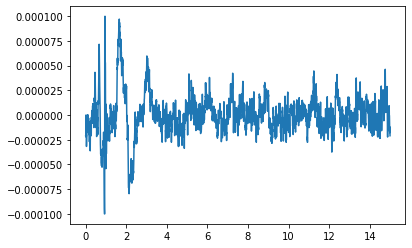

In [12]:
#plot any section of signal
x = raw_selection[1]
y = raw_selection[0].T
plt.plot(x, y)


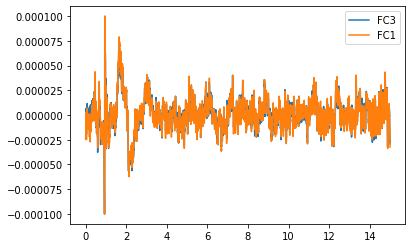

In [13]:
#plot any number of signals in a single graph
channel_names = ['FC3', 'FC1']
two_meg_chans = raw[channel_names, start_sample:stop_sample]
y_offset = np.array([5e-11, 0])  # just enough to separate the channel traces
x = two_meg_chans[1]
y = two_meg_chans[0].T + y_offset
lines = plt.plot(x, y)
plt.legend(lines, channel_names)

In [14]:
names=[]
for i,j in enumerate(raw._raw_extras[0]):
    names.append(j)
print(names)   

['type', 'subtype', 'number', 'bytes_tot', 'ch_names', 'data_offset', 'dtype_byte', 'dtype_np', 'digital_max', 'exclude', 'gnd', 'highpass', 'sel', 'impedance', 'lowpass', 'meas_date', 'meas_id', 'n_records', 'n_samps', 'nchan', 'notch', 'subject_info', 'physical_max', 'record_length', 'ref', 'units', 'event_sfreq', 'events', 'stim_channel_idxs', 'max_samp', 'nsamples', 'cal', 'offsets', 'orig_nchan']


In [15]:
(raw._raw_extras[0]['ch_names'])

['EEG-Fz',
 'EEG',
 'EEG',
 'EEG',
 'EEG',
 'EEG',
 'EEG',
 'EEG-C3',
 'EEG',
 'EEG-Cz',
 'EEG',
 'EEG-C4',
 'EEG',
 'EEG',
 'EEG',
 'EEG',
 'EEG',
 'EEG',
 'EEG',
 'EEG-Pz',
 'EEG',
 'EEG',
 'EOG-left',
 'EOG-central',
 'EOG-right']

In [16]:
#events 1:position  2:name of the task  3:some 0s   4:some mapping
#276:29682  277:20271 768:1875 769:313 770:313 771:313 772:313 1023:1875 1072:41562 32766:1  
#print(len((raw._raw_extras[0]['events'][2][0])))

for i in range(603):
    #print((raw._raw_extras[0]['events'][1][i]),raw._raw_extras[0]['events'][2][i])
    print((raw._raw_extras[0]['events'][1][i]),':',(raw._raw_extras[0]['events'][4][i]))


0 : 1
0 : 29682
29683 : 1
29683 : 20271
49955 : 1
49955 : 41562
91518 : 1
91868 : 1875
92368 : 313
93871 : 1875
94371 : 313
95789 : 1875
96289 : 313
97741 : 1875
98241 : 313
99749 : 1875
100249 : 313
101860 : 1875
102360 : 313
103777 : 1875
104277 : 313
105827 : 1875
106327 : 313
107758 : 1875
108258 : 313
109756 : 1875
110256 : 313
111662 : 1875
112162 : 313
113557 : 1875
114057 : 313
115529 : 1875
116029 : 313
117473 : 1875
117973 : 313
119440 : 1875
119940 : 313
121560 : 1875
122060 : 313
123568 : 1875
124068 : 313
125634 : 1875
126134 : 313
127670 : 1875
128170 : 313
129736 : 1875
130236 : 313
131806 : 1875
132306 : 313
133886 : 1875
133886 : 1875
134386 : 313
135798 : 1875
136298 : 313
137829 : 1875
138329 : 313
139782 : 1875
140282 : 313
141743 : 1875
142243 : 313
143847 : 1875
144347 : 313
145851 : 1875
146351 : 313
147826 : 1875
148326 : 313
149852 : 1875
150352 : 313
151923 : 1875
152423 : 313
154030 : 1875
154530 : 313
156122 : 1875
156622 : 313
158213 : 1875
158713 : 313
160

In [17]:
start, stop = raw.time_as_index([100, 115])
data, times = raw[:400, start:stop]
print(data.shape)
print(times.shape)
print(times.min(), times.max())

(25, 3750)
(3750,)
100.0 114.996


In [18]:
xRaw=raw.get_data()

In [19]:
xRaw.shape

(25, 672528)

Effective window size : 8.192 (s)


<ipython-input-34-a5fcf744740b>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


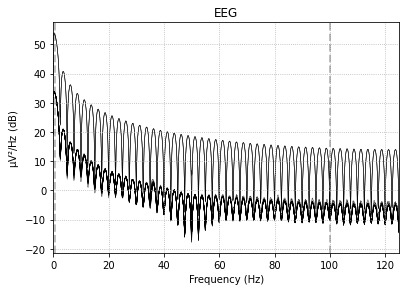

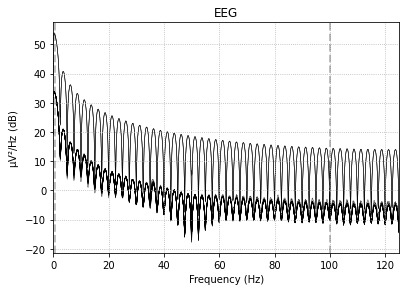

In [34]:
raw.plot_psd()

<IPython.core.display.Javascript object>


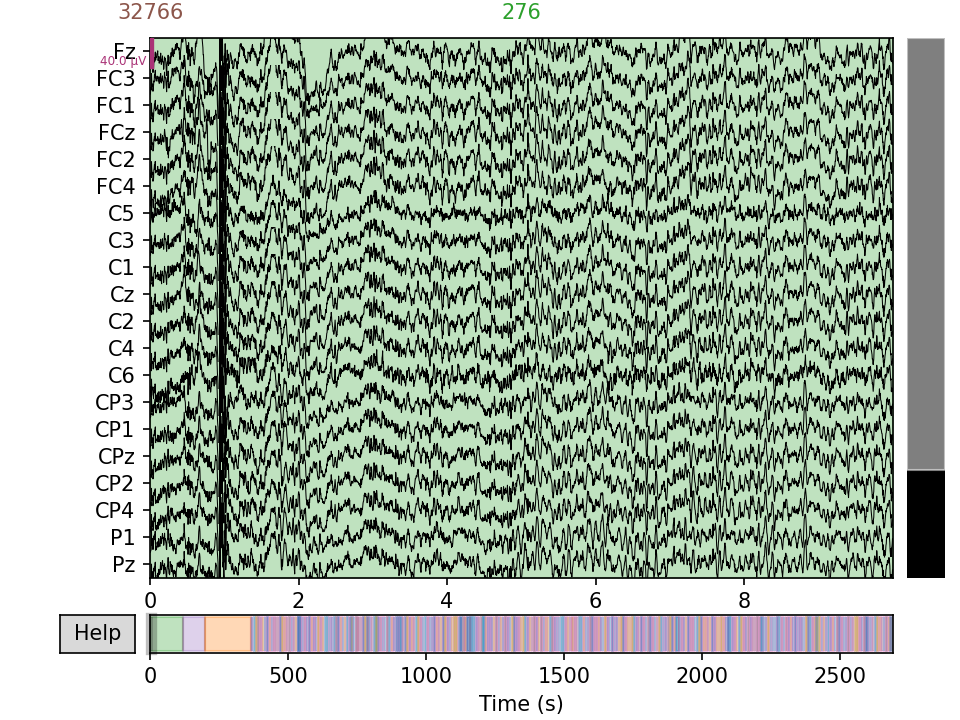

<IPython.core.display.Javascript object>


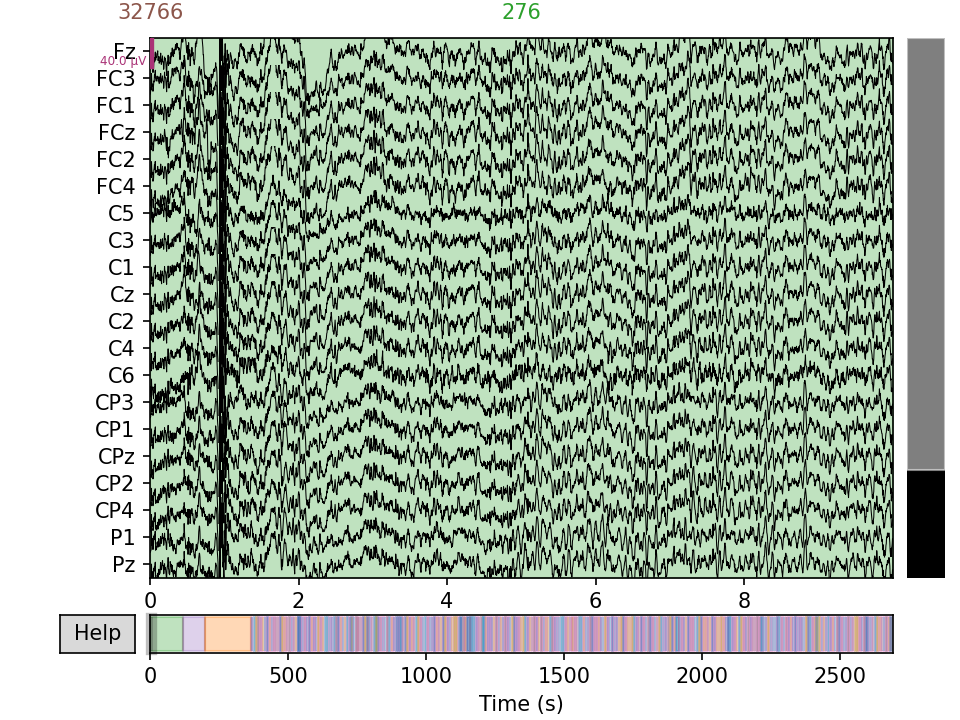

In [16]:
%matplotlib notebook
raw.plot()

In [7]:
mne.channels.get_builtin_montages()

['EGI_256',
 'GSN-HydroCel-128',
 'GSN-HydroCel-129',
 'GSN-HydroCel-256',
 'GSN-HydroCel-257',
 'GSN-HydroCel-32',
 'GSN-HydroCel-64_1.0',
 'GSN-HydroCel-65_1.0',
 'biosemi128',
 'biosemi16',
 'biosemi160',
 'biosemi256',
 'biosemi32',
 'biosemi64',
 'easycap-M1',
 'easycap-M10',
 'mgh60',
 'mgh70',
 'standard_1005',
 'standard_1020',
 'standard_alphabetic',
 'standard_postfixed',
 'standard_prefixed',
 'standard_primed']

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


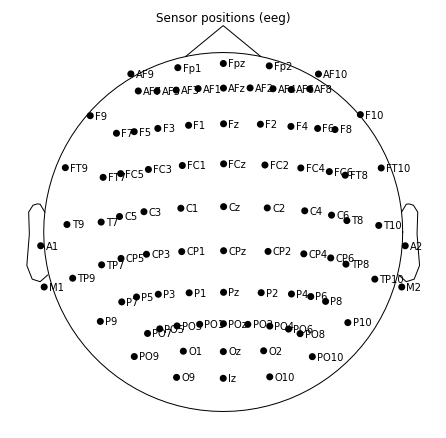

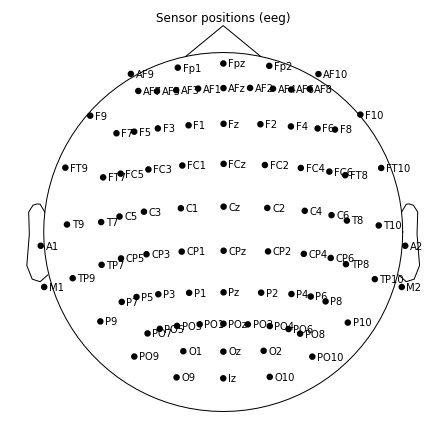

In [9]:
#ch_names = ['Fz','FC3','FC1','FCz','FC2','FC4','C5','C3','C1','Cz','C2','C4','C6','CP3','CP1','CPz','CP2','CP4','P1','Pz','P2','POz','M1','FPz','M2']
#info = mne.create_info(ch_names, 250, ch_types=["eeg"] * 22 + ["eog"] * 3)
#raw = mne.io.RawArray(raw_df, info)
#raw.set_montage("standard_1020")
montage=mne.channels.make_standard_montage("standard_1020")
montage.plot()

In [10]:
raw.set_montage(montage,match_case=False)

<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MB, data loaded>

In [23]:
raw.set_eeg_reference("average")

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MB, data loaded>

In [24]:
print(raw.time_as_index(3))

[750]


In [20]:
raw_df=raw.to_data_frame()
print(type(raw_df))
print(raw_df)

<class 'pandas.core.frame.DataFrame'>
           time         Fz        FC3        FC1        FCz        FC2  \
0             0 -21.142578 -23.681641 -21.484375 -25.146484 -25.732422   
1             4 -21.923828 -23.925781 -24.316406 -25.341797 -26.074219   
2             8 -15.625000 -19.726562 -18.847656 -21.582031 -20.751953   
3            12 -16.699219 -13.720703 -20.361328 -20.849609 -24.169922   
4            16 -19.335937 -17.626953 -20.410156 -26.464844 -27.392578   
...         ...        ...        ...        ...        ...        ...   
672523  2690092 -13.183594  -1.367188  -2.734375  -5.224609 -10.546875   
672524  2690096  -8.593750  -1.025391   0.341797  -3.076172  -7.080078   
672525  2690100   5.517578  10.498047  14.941406  12.255859   9.228516   
672526  2690104   1.464844   3.076172   9.228516   8.447266   7.421875   
672527  2690108   1.367188   3.515625   7.861328   9.570312   9.716797   

              FC4         C5         C3         C1  ...        CPz       

# Pre-processing

In [11]:
raw_tmp = raw.copy()
raw_tmp.filter(1, None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 sec)



<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MB, data loaded>

In [12]:
#ica = mne.preprocessing.ICA(n_components=20, random_state=1)
#ica = mne.preprocessing.ICA(random_state=0)
ica = mne.preprocessing.ICA(method="infomax",s
                            fit_params={"extended": True},
                            random_state=1)

In [13]:
#ica.fit(raw.copy().filter(8, 35))
#ica.fit(raw.copy().filter(1,None))
ica.fit(raw_tmp)

Fitting ICA to data using 25 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 23 components
Computing Extended Infomax ICA


<ipython-input-13-e50a6ff58d4b>:3: RuntimeWarning: Using n_components=None (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (25) and smallest (1.8e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 20
  ica.fit(raw_tmp)


Fitting ICA took 295.4s.


<ICA | raw data decomposition, fit (infomax): 672528 samples, 23 components, channels used: "eeg">

<IPython.core.display.Javascript object>


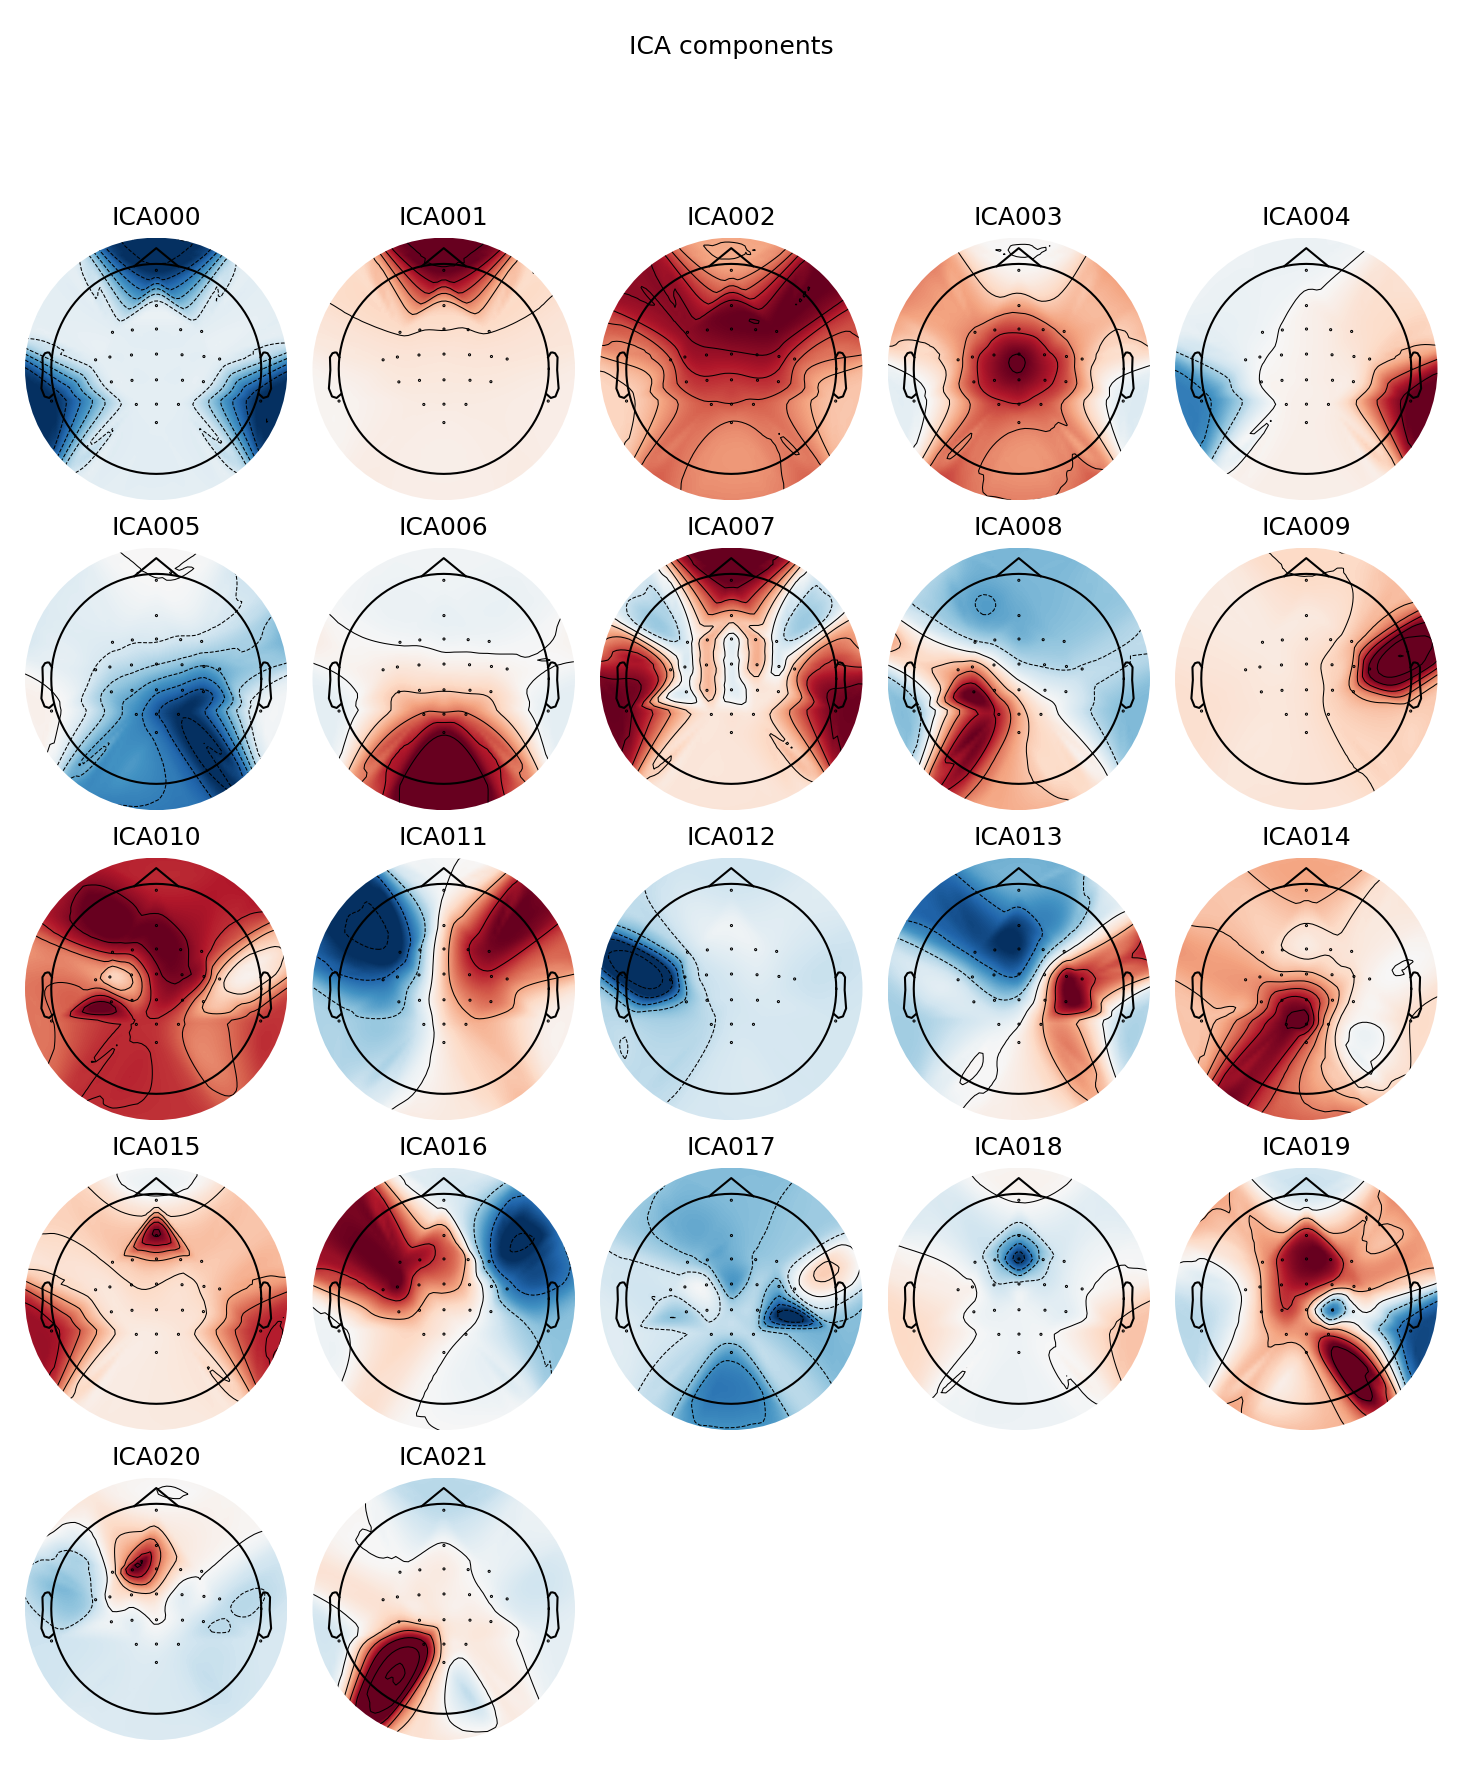

<IPython.core.display.Javascript object>


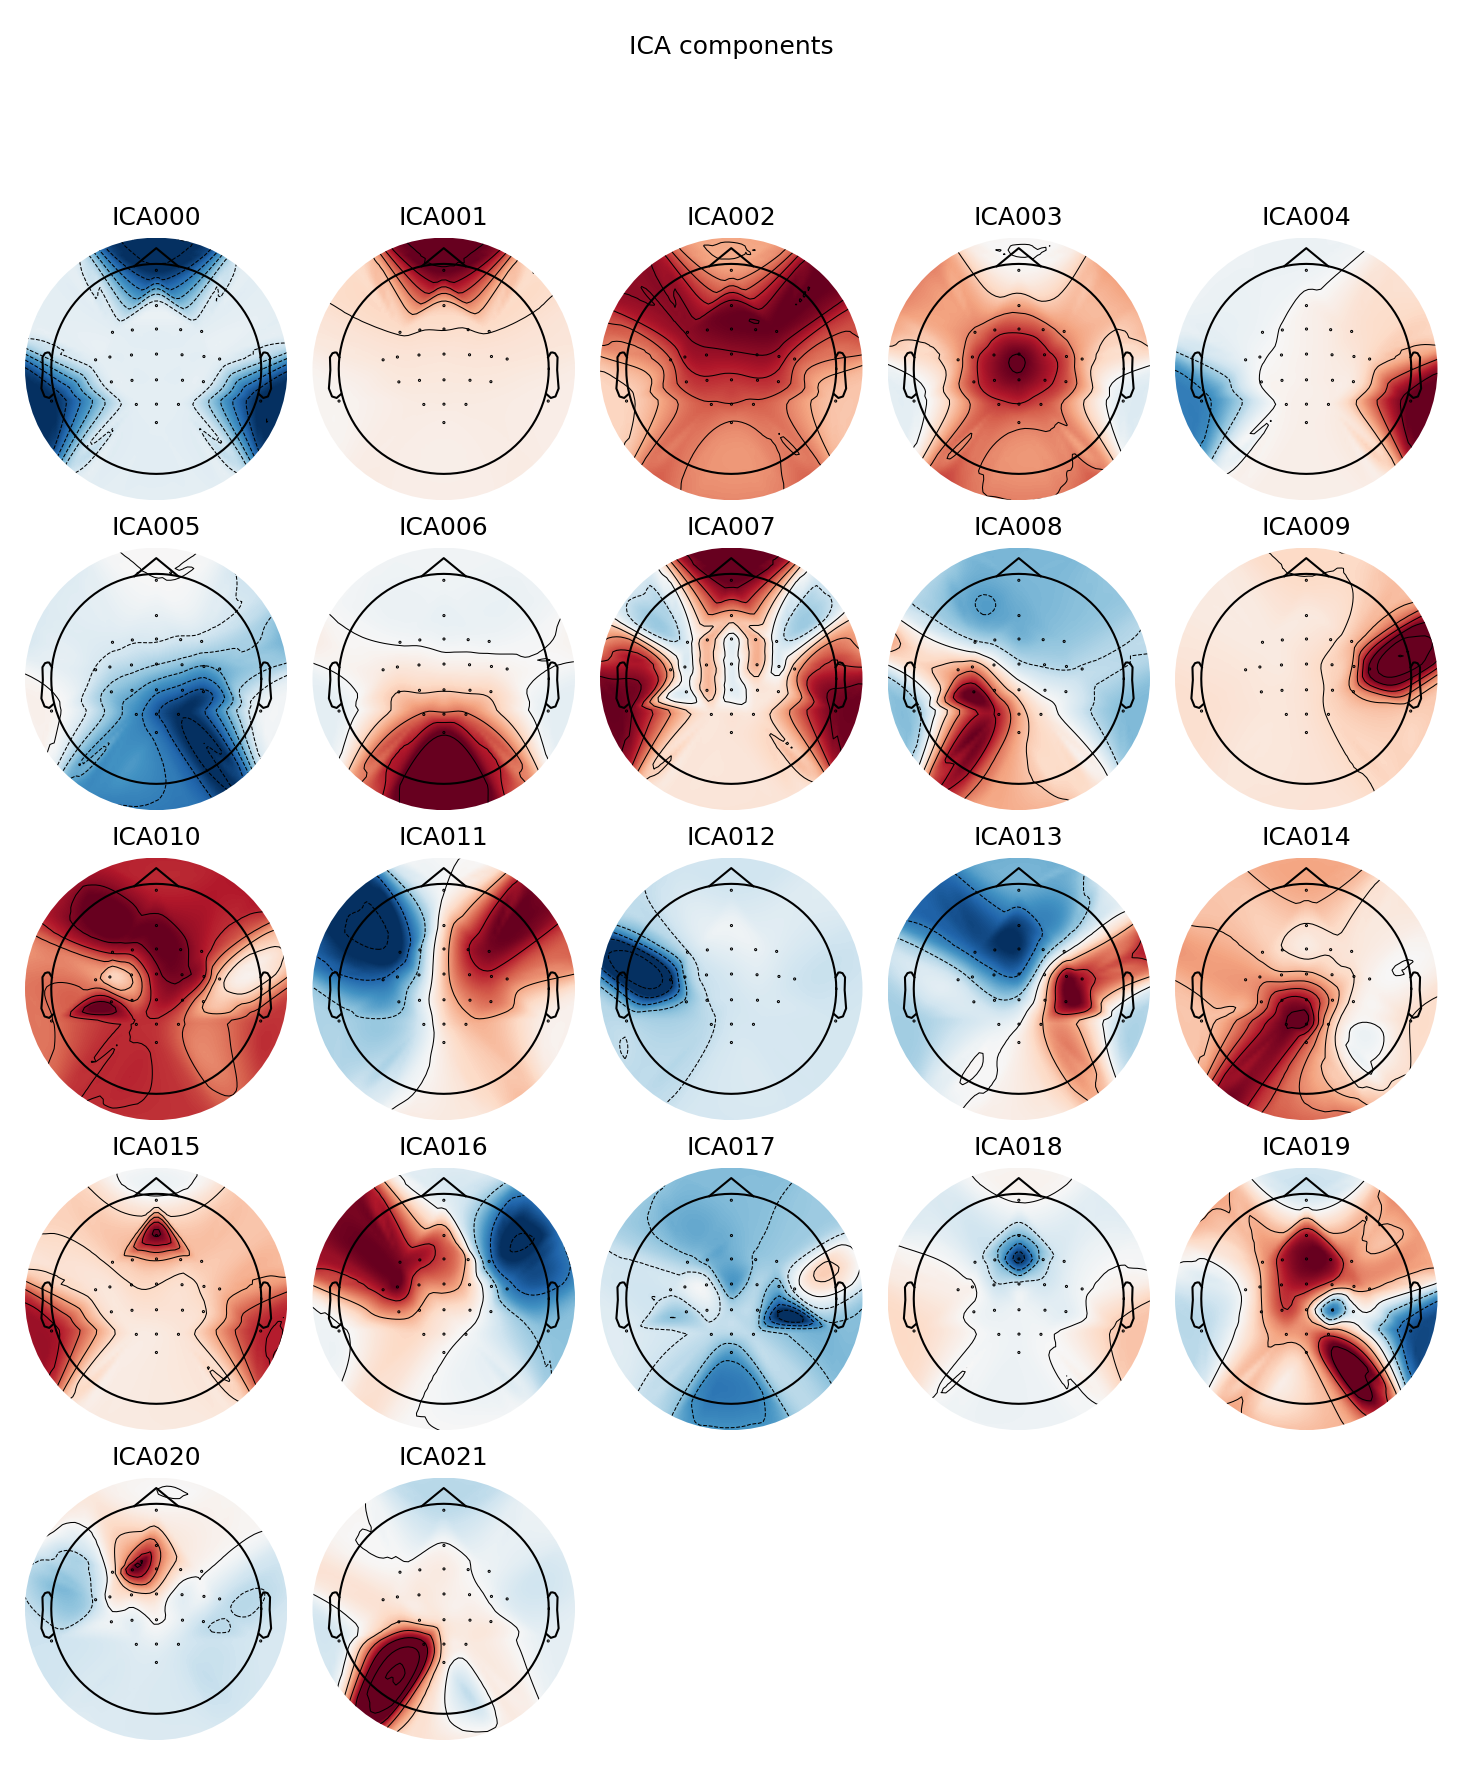

In [15]:
%matplotlib notebook
ica.plot_components(inst=raw_tmp, picks=range(22),outlines='skirt')

In [16]:
bad_idx,scores=ica.find_bads_eog(raw,'Fz',threshold=1.5)
print(bad_idx)

Using channel Fz as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 1

In [33]:
raw_tmp = raw.copy()
raw_tmp.filter(1, None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 sec)



<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MB, data loaded>

<IPython.core.display.Javascript object>


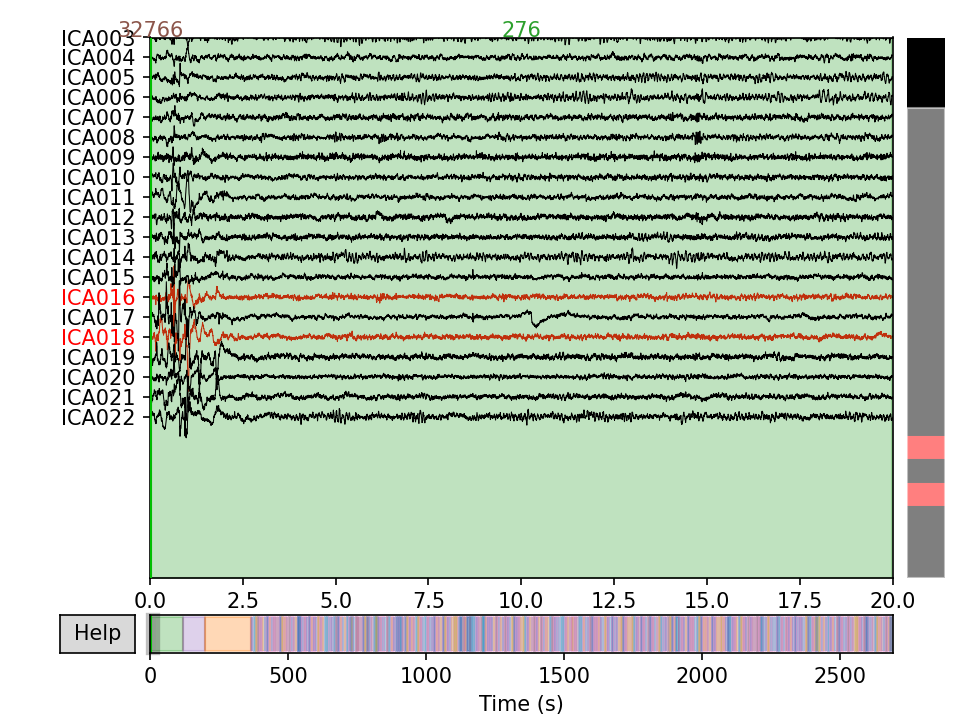

<IPython.core.display.Javascript object>


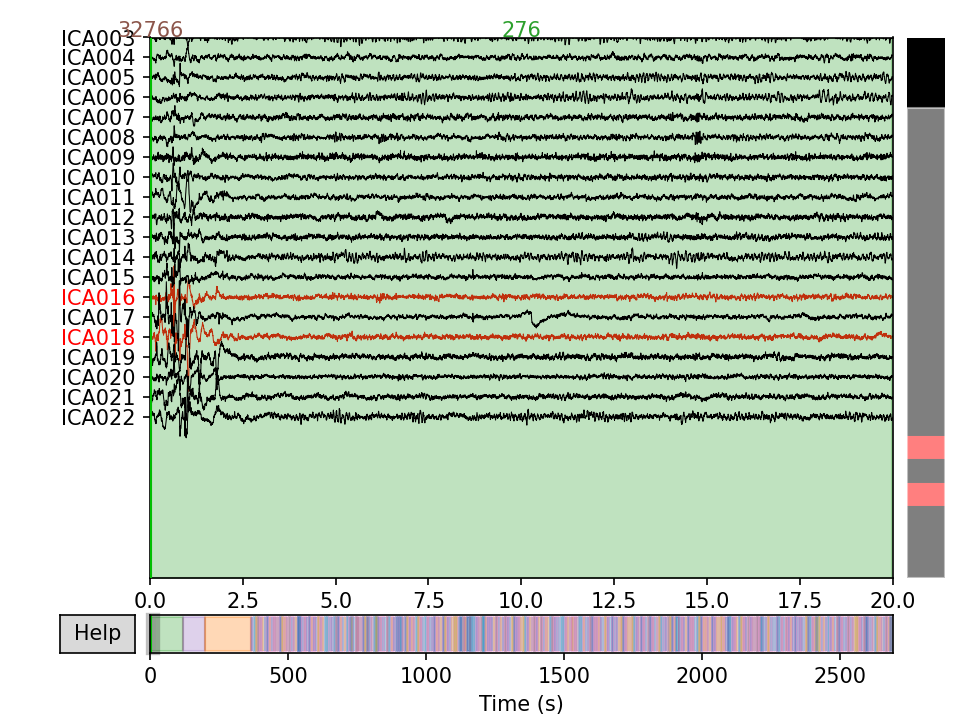

In [37]:
ica.plot_sources(inst=raw_tmp)

In [23]:
ica.exclude = [0,1,2]

In [24]:
raw_corrected = raw.copy()
ica.apply(raw_corrected)

Applying ICA to Raw instance
    Transforming to ICA space (23 components)
    Zeroing out 3 ICA components
    Projecting back using 25 PCA components


<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MB, data loaded>

<IPython.core.display.Javascript object>


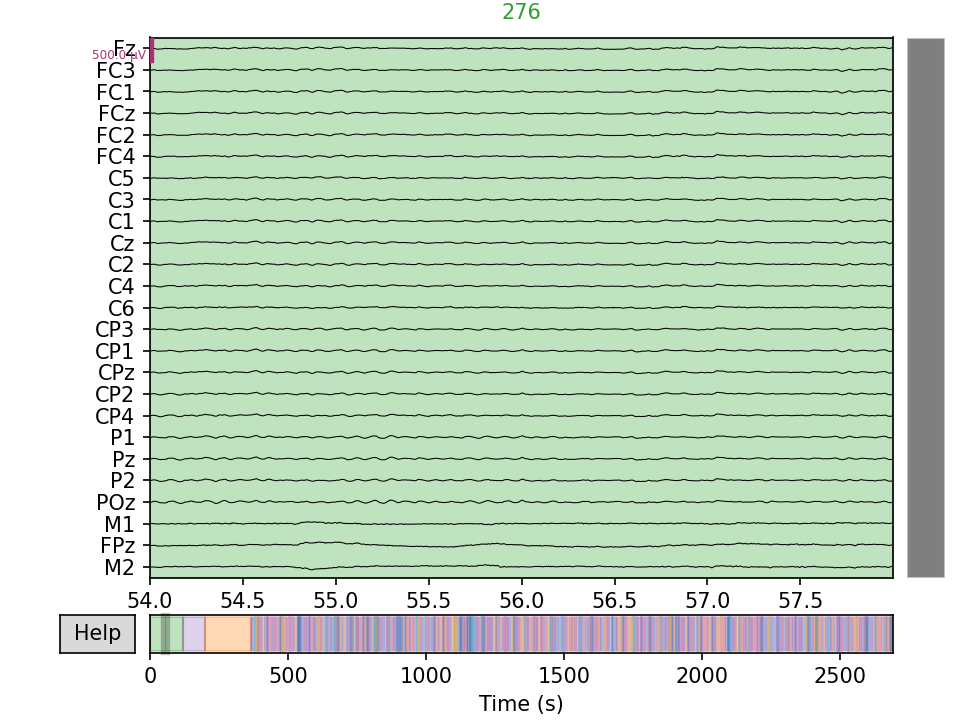

<IPython.core.display.Javascript object>


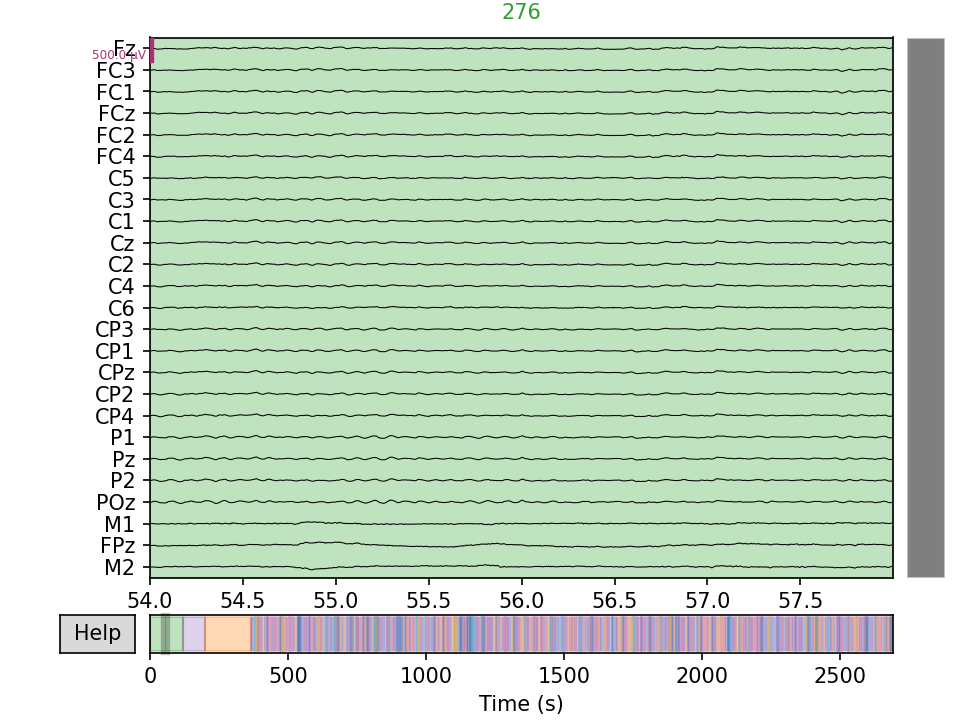

In [25]:
%matplotlib notebook
raw.plot(n_channels=25, start=54, duration=4,
         scalings=dict(eeg=250e-6, eog=750e-6))

<IPython.core.display.Javascript object>


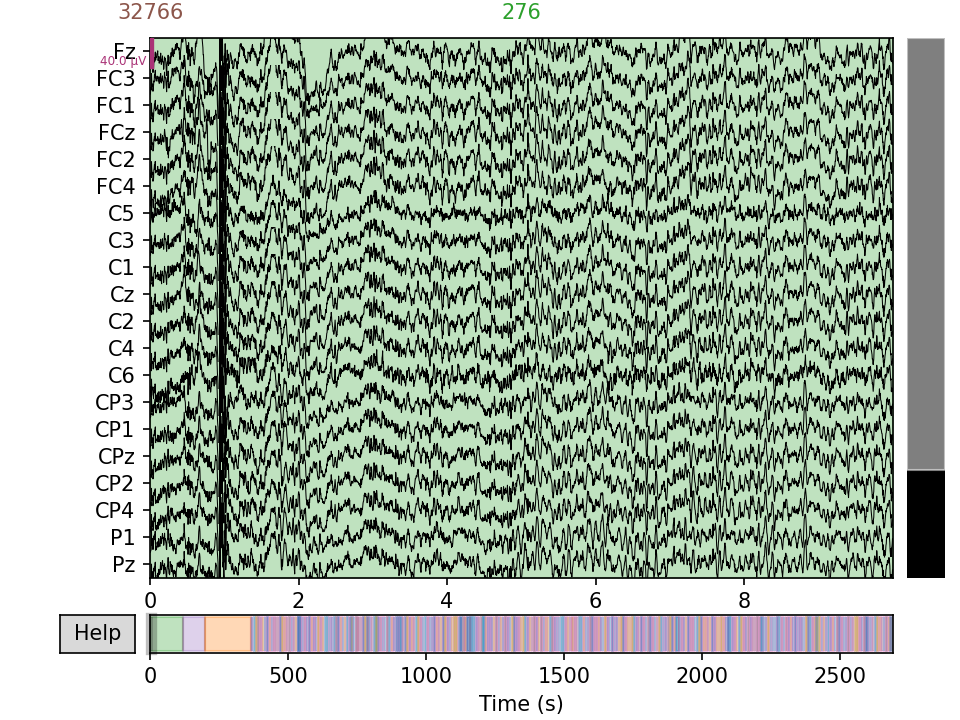

<IPython.core.display.Javascript object>


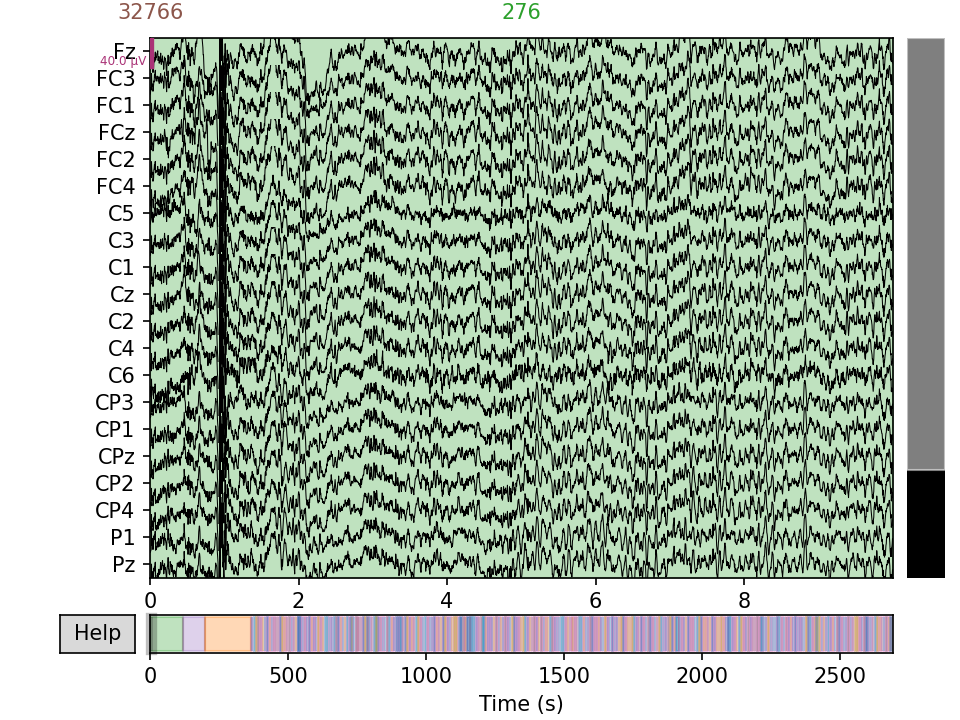

In [26]:
%matplotlib notebook
raw.plot()

<IPython.core.display.Javascript object>


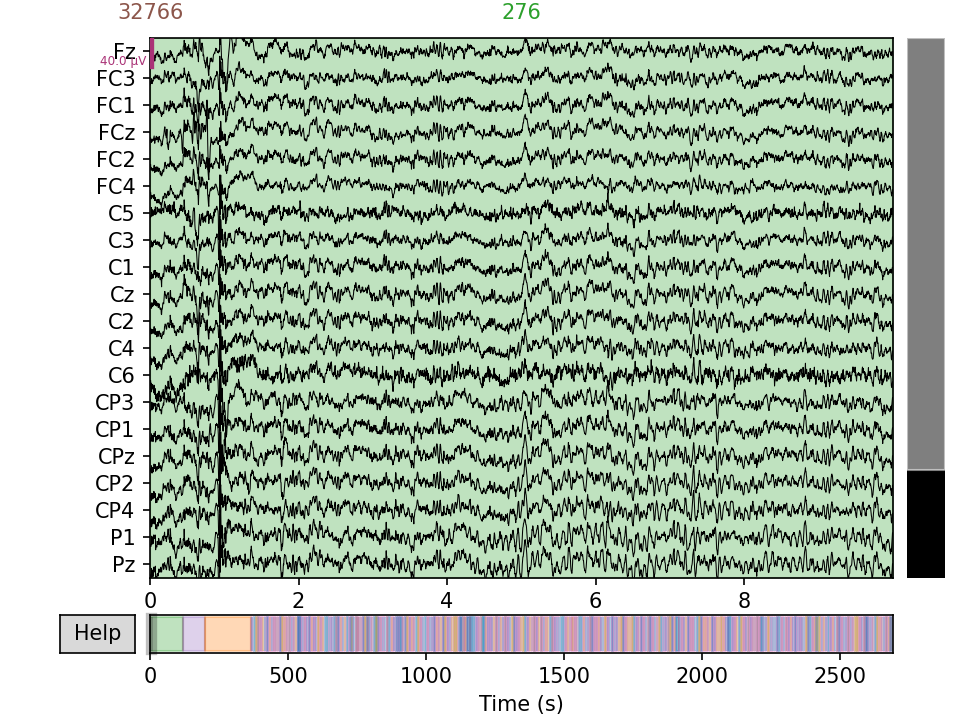

<IPython.core.display.Javascript object>


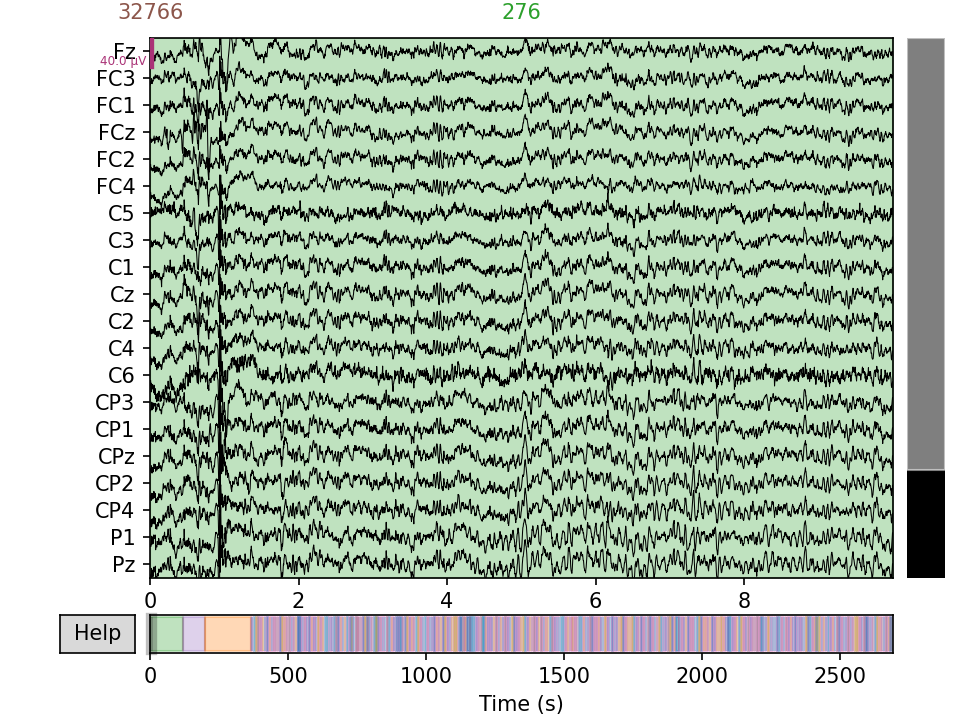

In [27]:
%matplotlib notebook
raw_corrected.plot()

In [28]:
raw_corrected_df=raw_corrected.to_data_frame()
raw_corrected_df

time         Fz        FC3        FC1        FCz        FC2  \
0             0  -4.271743  -8.925069  -6.048628  -9.234895  -9.674781   
1             4  -6.884559 -10.490897 -10.209486 -10.780338 -11.358702   
2             8  -2.404073  -8.172584  -6.762170  -9.123786  -8.179635   
3            12  -6.584202  -5.387956 -11.687781 -11.914444 -15.174990   
4            16  -7.371295  -7.577309  -9.995830 -15.768531 -16.633296   
...         ...        ...        ...        ...        ...        ...   
672523  2690092   5.750944  12.498808  11.132165   8.814465   3.391877   
672524  2690096  10.066445  12.885502  14.282624  11.044668   6.954507   
672525  2690100  13.461924  14.072234  17.940090  15.059460  11.786791   
672526  2690104  11.912612   8.780201  14.379853  13.431067  12.158657   
672527  2690108  11.038014   8.764679  12.598099  14.152473  14.069584   

              FC4         C5         C3         C1  ...        CPz        CP2  \
0      -12.037816  -4.425177  -9.839380 -11.950690  ... -19.335983 -18.036388   
1      -10.709762  -6.778325 -11.085387 -15.880755  ... -20.601853 -19.962326   
2       -9.285511  -4.532204 -10.496317 -13.175213  ... -19.938682 -19.343529   
3      -13.085078  -5.615960  -9.511445 -18.272339  ... -21.873328 -22.752957   
4      -19.184964  -2.408380  -9.906461 -15.654987  ... -24.435930 -26.082947   
...           ...        ...        ...        ...  ...        ...        ...   
672523   2.545570   6.275756  10.084011   9.608966  ...   8.021560   5.661352   
672524   5.305684   9.023160  10.240362  12.697952  ...  10.352852   7.890470   
672525   8.628940  15.004183  13.539644  17.584246  ...  14.883837  12.005907   
672526   9.055433   8.991593   7.796595  13.602078  ...   9.922180   9.900620   
672527  11.721820   7.585815   7.979532  12.235531  ...  11.927782  11.319419   

              CP4         P1         Pz         P2        POz         M1  \
0      -15.626129 -11.441276 -15.768005 -15.577996 -12.062398  31.312516   
1      -15.903519 -14.157266 -18.105253 -17.700678 -16.229482  23.468236   
2      -15.833931 -13.956926 -17.538132 -16.980077 -15.537708  33.086404   
3      -19.763441 -14.525352 -19.408138 -19.800494 -14.265062  31.765631   
4      -25.364001 -12.286426 -20.237891 -22.304756 -13.379759  37.179575   
...           ...        ...        ...        ...        ...        ...   
672523   2.893599   7.170521   5.665476   3.842444   5.074528  -3.048488   
672524   5.954246   8.421426   8.721808   6.457343   6.508028   0.035164   
672525   8.771349  11.311165  12.276277  11.200991   9.673839   1.911432   
672526   7.457018   5.516294   7.128420   6.763975   2.409326  -0.714005   
672527   9.847447   5.350493   7.256004   8.057180   2.943708  -2.020833   

             FPz         M2  
0       3.404155 -42.940700  
1       0.171407 -38.338118  
2       4.916761 -38.054146  
3      -1.419153 -47.745425  
4       2.279006 -48.590715  
...          ...        ...  
672523 -0.216154   4.765664  
672524  5.299366  14.066015  
672525  6.427849  13.915457  
672526  7.476937  18.327581  
672527  5.088465  12.006207  

[672528 rows x 26 columns]